In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [ ]:
# Cargar el dataset
df_class = pd.read_csv("/content/Clasificación_2_dataset.csv")

In [ ]:
# Dimensiones del dataset
df_class.shape

(1500, 16)

In [ ]:
df_class.dtypes

,0
X1,float64
X2,float64
X3,float64
X4,float64
X5,float64
X6,float64
X7,float64
X8,float64
X9,float64
X10,float64


In [ ]:
# Primeras filas
df_class.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,-2.388741,6.221087,3.442447,1.273807,0.912272,8.908027,8.441999,-2.607863,-7.539959,5.810530,-6.960356,-2.460638,-9.276179,-4.184623,-8.896234,2
1,-6.012792,-9.884413,-1.590610,4.999943,0.247758,-1.197048,-10.939272,1.533927,7.638279,6.033323,6.045052,-7.453784,8.672267,7.474841,-6.603927,0
2,2.270829,-8.849332,-6.619179,-2.861520,-6.720253,5.715418,6.493857,-4.429523,-3.821490,-6.438497,-8.818146,3.422536,3.376605,-8.850959,-0.717626,1
3,-7.092421,-10.254081,-0.907321,3.712683,-0.567676,0.254027,-10.135377,-0.412888,8.421732,6.706882,4.189576,-7.909424,8.303048,8.711827,-6.575260,0
4,-2.246293,7.617936,3.580218,2.412760,3.881735,8.096439,8.372886,-4.655989,-4.807351,5.980022,-9.098483,-2.709957,-9.063194,-4.737577,-8.630724,2


In [ ]:
# Información del DataFrame
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1497 non-null   float64
 2   X3      1500 non-null   float64
 3   X4      1497 non-null   float64
 4   X5      1499 non-null   float64
 5   X6      1500 non-null   float64
 6   X7      1499 non-null   float64
 7   X8      1499 non-null   float64
 8   X9      1500 non-null   float64
 9   X10     1498 non-null   float64
 10  X11     1498 non-null   float64
 11  X12     1499 non-null   float64
 12  X13     1499 non-null   float64
 13  X14     1500 non-null   float64
 14  X15     1500 non-null   float64
 15  Y       1500 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 187.6 KB


In [ ]:
# Estadísticas descriptivas (numéricas)
df_class.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
count,1500.000000,1497.000000,1500.000000,1497.000000,1499.000000,1500.000000,1499.000000,1499.000000,1500.000000,1498.000000,1498.000000,1499.000000,1499.000000,1500.000000,1500.000000,1500.000000
mean,-1.883910,-4.075099,-1.382158,0.920043,-2.471415,4.634421,2.112540,-2.174120,0.030046,1.693476,-4.200176,-2.092793,0.364311,-1.789200,-5.253161,1.000000
std,3.834396,7.897076,5.051711,3.539492,3.470882,3.955879,8.510537,1.729567,6.403340,6.744790,6.244312,5.019266,6.929017,6.713716,3.604286,0.816769
min,-9.028149,-13.311122,-10.556390,-6.713349,-10.050322,-3.461197,-12.871957,-5.879455,-8.092116,-10.879760,-11.958360,-11.674289,-11.888570,-11.886751,-11.533303,0.000000
25%,-5.695571,-9.919480,-7.157683,-2.919740,-6.301859,0.371108,-8.982112,-3.523258,-4.819111,-7.075972,-8.866134,-7.156965,-8.045253,-8.207881,-8.090071,0.000000
50%,-1.986221,-8.899808,-0.788744,2.032352,-1.602947,5.129056,6.295880,-2.547017,-3.543957,5.560343,-7.848457,-2.642599,1.913803,-3.520108,-6.762037,1.000000
75%,1.998095,6.259801,3.629647,3.778093,0.507027,8.334606,9.074141,-0.788418,8.205810,6.782746,3.801478,3.464049,7.215220,6.430320,-1.055850,2.000000
max,6.040819,11.162159,7.478247,7.514823,3.915434,12.017239,12.307936,3.351869,12.243760,9.963494,7.883623,7.369420,10.548179,10.408096,2.208405,2.000000


In [ ]:
# Resumen de valores faltantes
missing_summary = df_class.isnull().sum().to_frame(name="n_missing")
missing_summary["pct_missing"] = missing_summary["n_missing"] / len(df_class) * 100
print("\nResumen de valores faltantes:")
missing_summary


Resumen de valores faltantes:


,n_missing,pct_missing
X1,0,0.000000
X2,3,0.200000
X3,0,0.000000
X4,3,0.200000
X5,1,0.066667
X6,0,0.000000
X7,1,0.066667
X8,1,0.066667
X9,0,0.000000
X10,2,0.133333


In [ ]:
df_class.shape

(1500, 16)

In [ ]:
df_class = df_class.dropna()

In [ ]:
df_class.shape

(1485, 16)

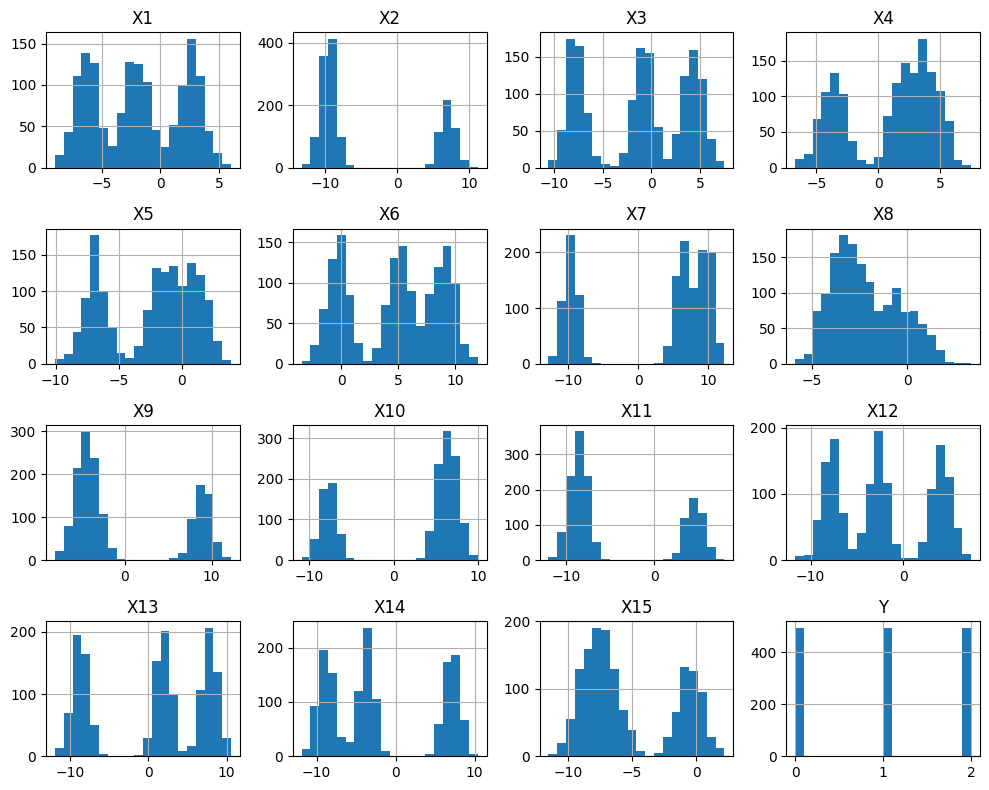

In [ ]:
# Distribuciones univariadas de variables numéricas
num_cols_class = df_class.select_dtypes(include=[np.number]).columns
df_class[num_cols_class].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

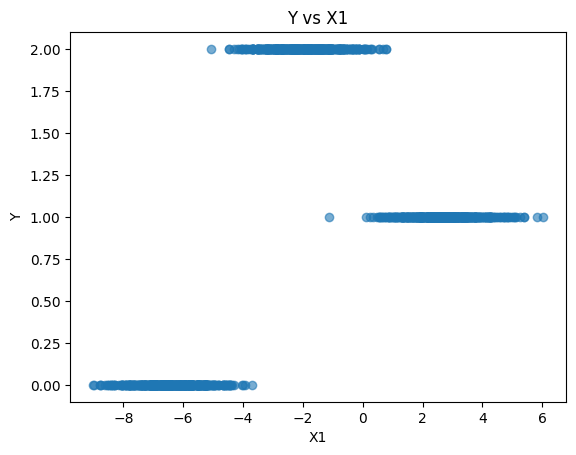

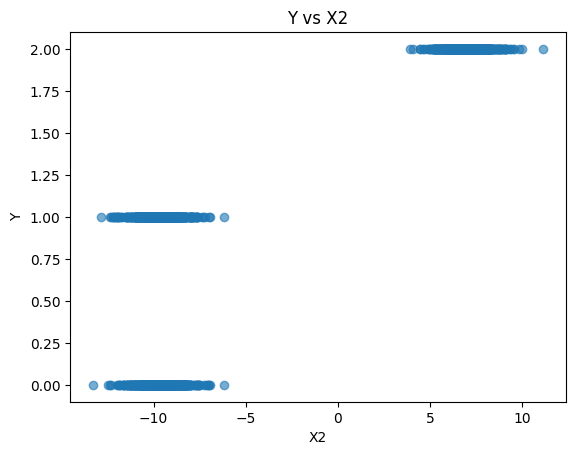

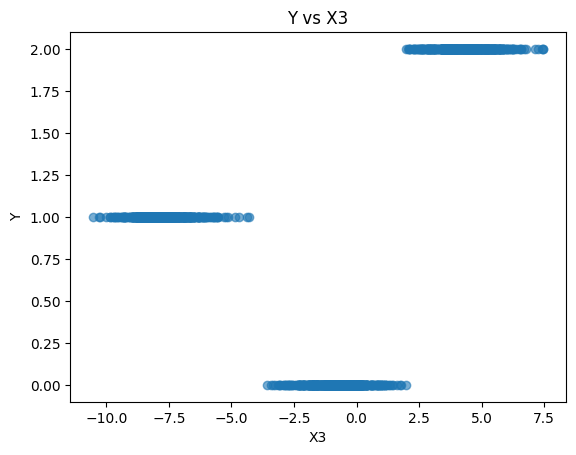

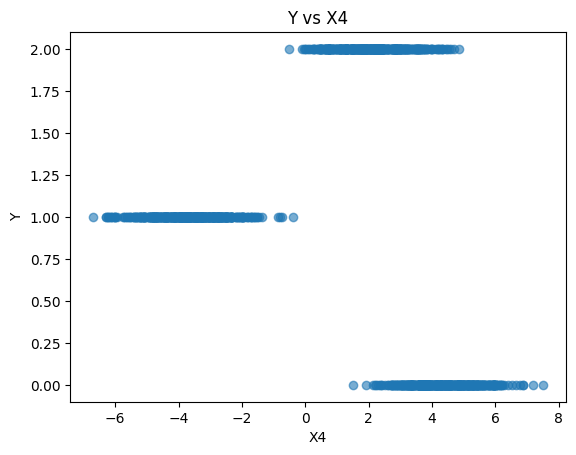

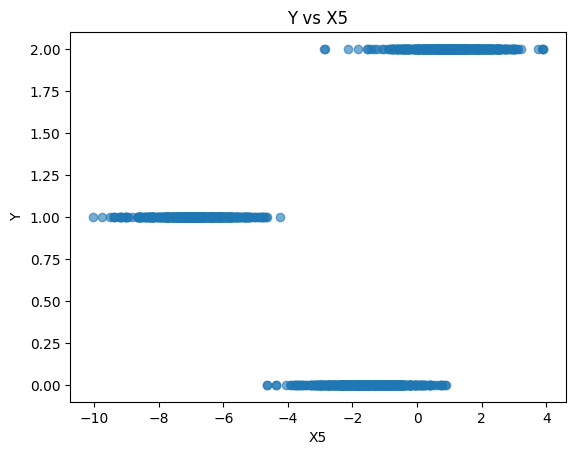

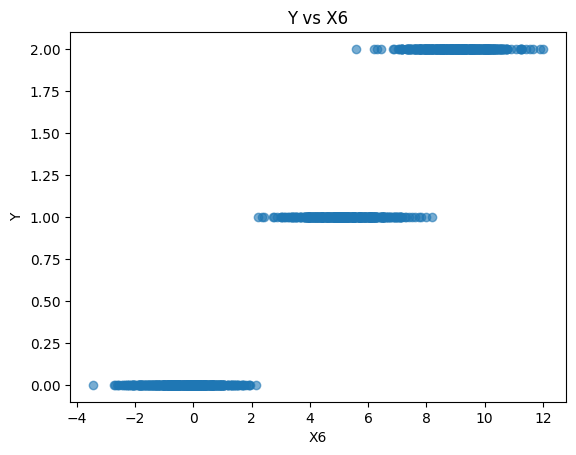

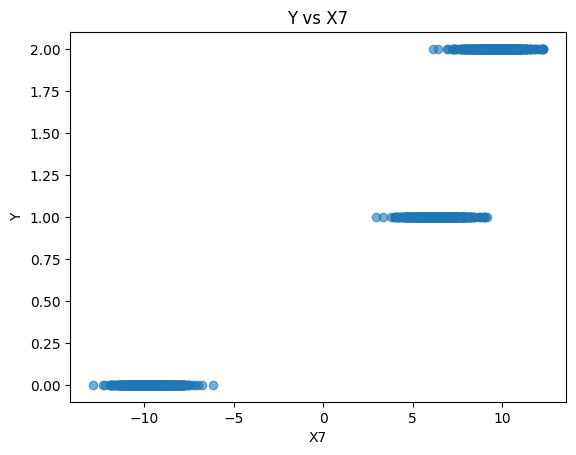

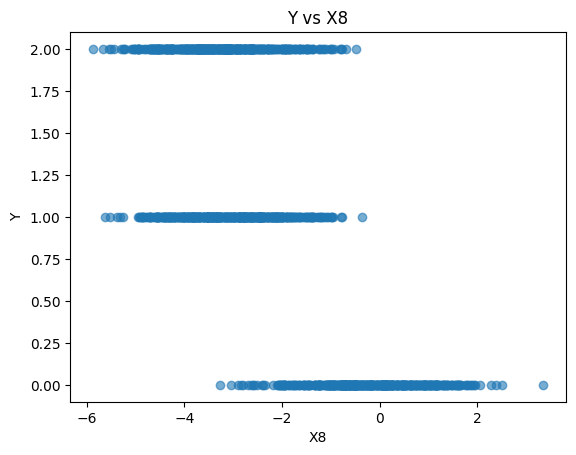

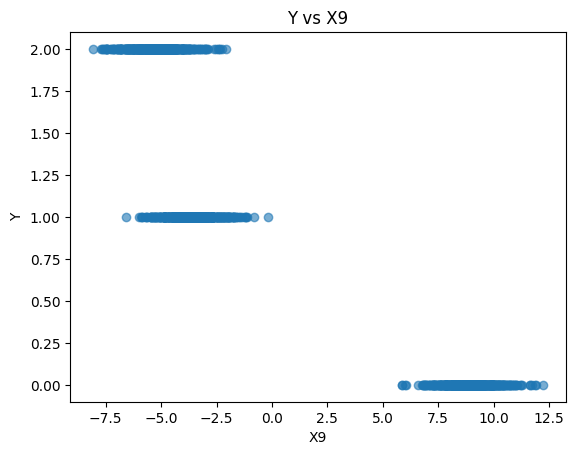

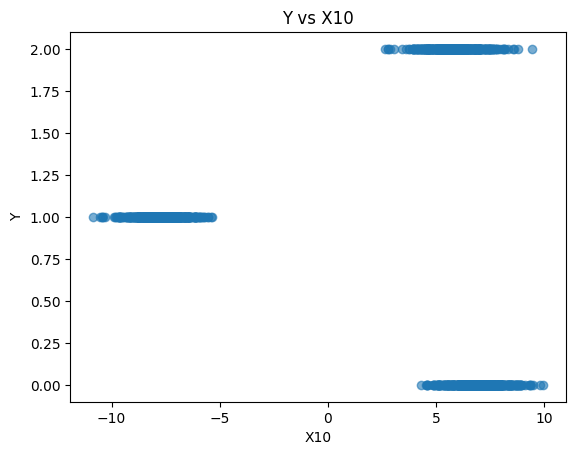

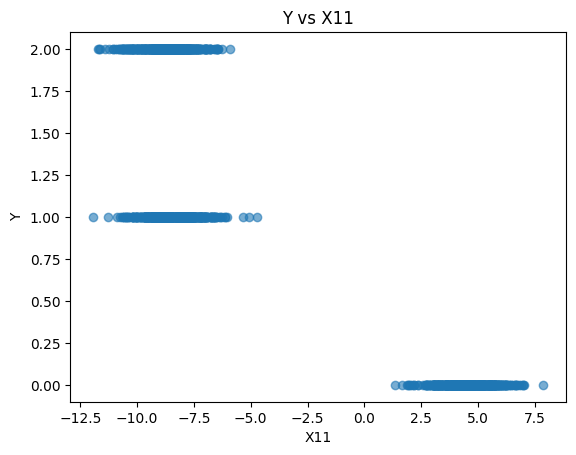

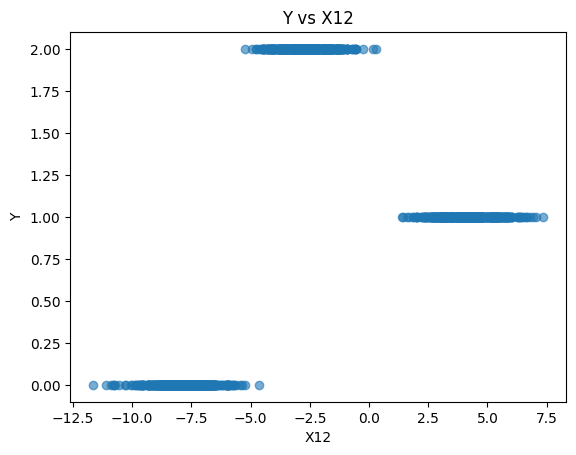

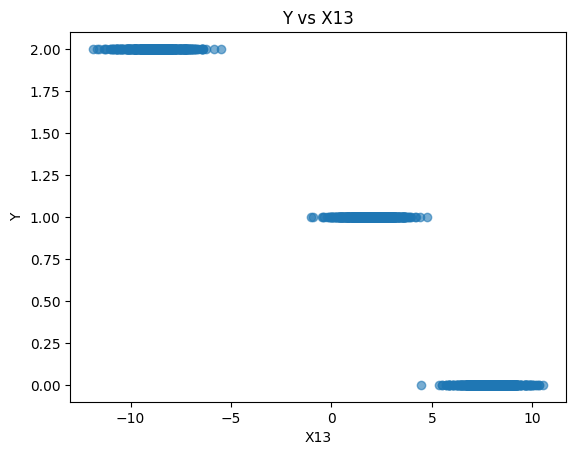

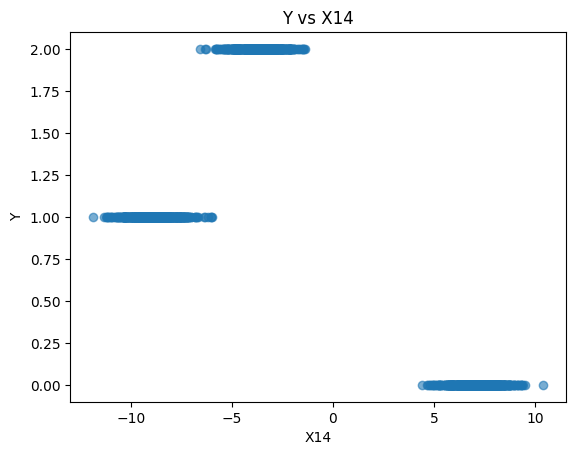

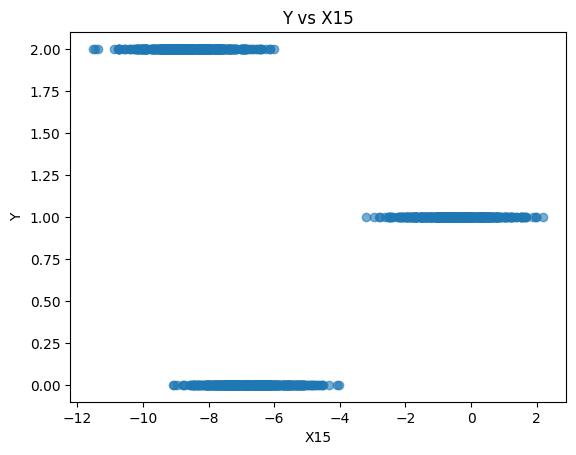

In [ ]:
for col in [c for c in num_cols_class.to_list() if c != "Y"]:
    plt.figure()
    plt.scatter(df_class[col], df_class["Y"], alpha=0.6)
    plt.title(f"Y vs {col}")
    plt.xlabel(col)
    plt.ylabel("Y")
    plt.show()

In [ ]:
from pandas.plotting import scatter_matrix

# Variables numéricas y clase+

numeric_cols_class = num_cols_class.drop("Y")
class_vals = df_class["Y"]

# Scatter matrix
import seaborn as sns

sns.pairplot(
    df_class[numeric_cols_class.tolist() + ["Y"]],
    hue="Y",
    diag_kind="hist",
    palette="Set1",
    plot_kws={"alpha": 0.6, "marker": "o"},
)
plt.suptitle("Pairplot de Variables Numéricas coloreado por Class", y=1.02, fontsize=16)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

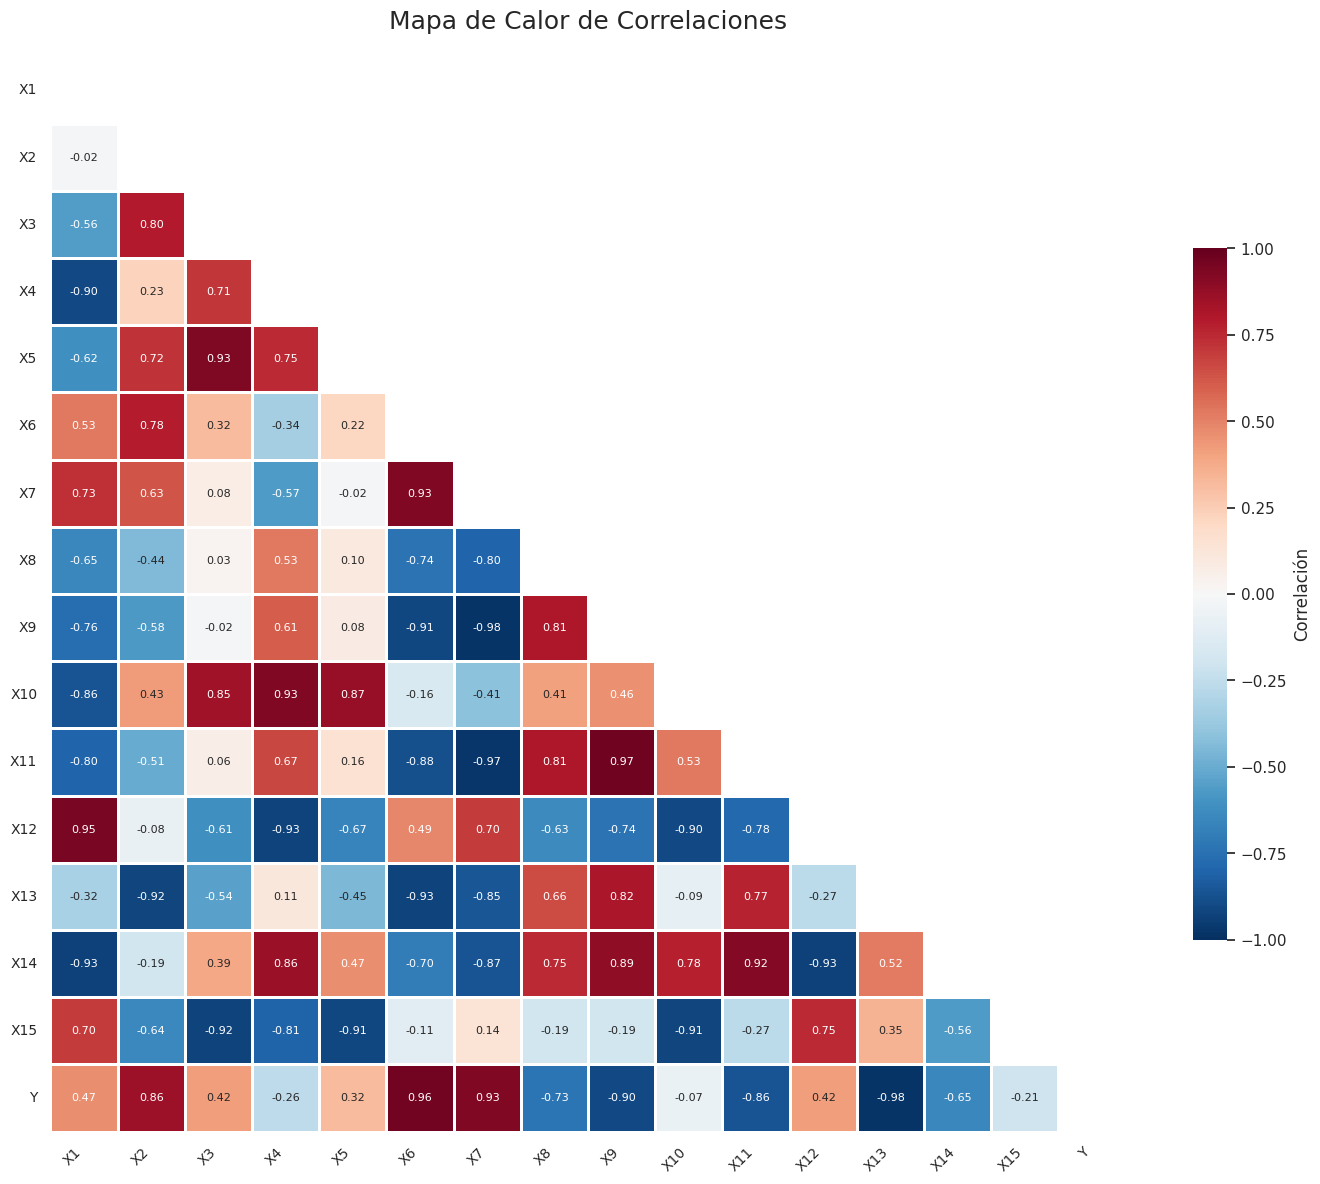

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_class[numeric_cols_class.tolist() + ["Y"]].corr()


sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))

n = corr.shape[0]
fig, ax = plt.subplots(figsize=(1.2 * n, 1.2 * n))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=1.0,  # líneas más gruesas entre celdas
    square=True,  # celdas cuadradas
    annot_kws={"size": 8},  # texto más pequeño
    cbar_kws={"shrink": 0.6, "label": "Correlación"},
    vmin=-1,
    vmax=1,
    ax=ax,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.subplots_adjust(bottom=0.3, left=0.2, top=0.9)

ax.set_title("Mapa de Calor de Correlaciones", fontsize=18, pad=20)

plt.show()

# Regression

In [ ]:
# Cargar el dataset
df_reg = pd.read_csv("/content/Regresión_2_dataset.csv")

In [ ]:
# Dimensiones del dataset
df_reg.shape

(1500, 13)

In [ ]:
df_reg.dtypes

,0
X1,float64
X2,float64
X3,float64
X4,float64
X5,float64
X6,float64
X7,float64
X8,float64
X9,float64
X10,float64


In [ ]:
# Primeras filas
df_reg.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,5468.737967,1.703822,-8613.627601,0.284719,-1.585462,-0.554724,-1.023031,-0.632593,-73183.99886,-0.119020,-0.801916,0.189757,-126.781682
1,-13104.449210,-1.019682,23061.174510,-0.820498,-0.265240,2.099421,-0.316338,-0.302272,-327842.82340,-0.315072,-1.925923,-0.687342,-166.589518
2,6204.272157,0.734018,133965.765100,-0.710429,0.574379,0.511245,0.298126,0.121694,120237.04040,0.892858,-0.474257,0.172296,171.818818
3,23979.672370,-1.777481,45514.777250,-0.148987,-0.006399,0.464724,0.356851,0.770954,-121603.94100,0.507455,0.673496,1.116824,111.490780
4,-2390.952073,-2.418137,47102.194950,0.384587,0.359033,0.178320,-1.063040,0.995341,139065.42410,1.572357,0.334709,-0.403581,138.329869


In [ ]:
# Información del DataFrame
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1499 non-null   float64
 1   X2      1500 non-null   float64
 2   X3      1495 non-null   float64
 3   X4      1497 non-null   float64
 4   X5      1495 non-null   float64
 5   X6      1498 non-null   float64
 6   X7      1499 non-null   float64
 7   X8      1498 non-null   float64
 8   X9      1500 non-null   float64
 9   X10     1496 non-null   float64
 10  X11     1498 non-null   float64
 11  X12     1499 non-null   float64
 12  Y       1499 non-null   float64
dtypes: float64(13)
memory usage: 152.5 KB


In [ ]:
# Estadísticas descriptivas (numéricas)
df_reg.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
count,1499.000000,1500.000000,1495.000000,1497.000000,1495.000000,1498.000000,1499.000000,1498.000000,1500.000000,1496.000000,1498.000000,1499.000000,1499.000000
mean,-298.970046,-0.000182,2505.655649,0.019644,-0.037554,-0.012483,-0.003856,0.028775,596.758217,0.012900,-0.040321,0.010624,-2.976044
std,12664.656465,1.036299,95364.185732,1.017798,0.975190,1.016689,0.964161,0.993368,233211.825271,0.999814,0.997520,0.978725,143.364341
min,-39838.521840,-3.710679,-336700.253400,-2.796599,-3.282985,-3.922695,-3.147417,-4.011049,-835370.363300,-3.126188,-2.937315,-2.716798,-519.074640
25%,-9433.010398,-0.677534,-60485.305915,-0.694018,-0.698821,-0.683112,-0.665480,-0.640609,-157687.903625,-0.686014,-0.692837,-0.678441,-99.192382
50%,-496.180129,0.021941,1748.071119,0.027749,-0.034482,-0.041862,-0.044291,0.027252,-1684.769781,-0.013111,-0.046213,0.031184,-1.531002
75%,8318.518644,0.705290,70803.472755,0.728685,0.615946,0.675086,0.613501,0.727090,163646.360200,0.701604,0.604628,0.676063,92.533762
max,44114.014510,3.156200,312030.703900,3.344649,3.515152,3.038999,3.041686,3.508867,854211.627100,3.218559,3.808566,3.529275,482.853143


In [ ]:
# Resumen de valores faltantes
missing_summary = df_reg.isnull().sum().to_frame(name="n_missing")
missing_summary["pct_missing"] = missing_summary["n_missing"] / len(df_reg) * 100
print("\nResumen de valores faltantes:")
missing_summary


Resumen de valores faltantes:


,n_missing,pct_missing
X1,1,0.066667
X2,0,0.000000
X3,5,0.333333
X4,3,0.200000
X5,5,0.333333
X6,2,0.133333
X7,1,0.066667
X8,2,0.133333
X9,0,0.000000
X10,4,0.266667


In [ ]:
df_reg.shape

(1500, 13)

In [ ]:
df_reg = df_reg.dropna()

In [ ]:
df_reg.shape

(1473, 13)

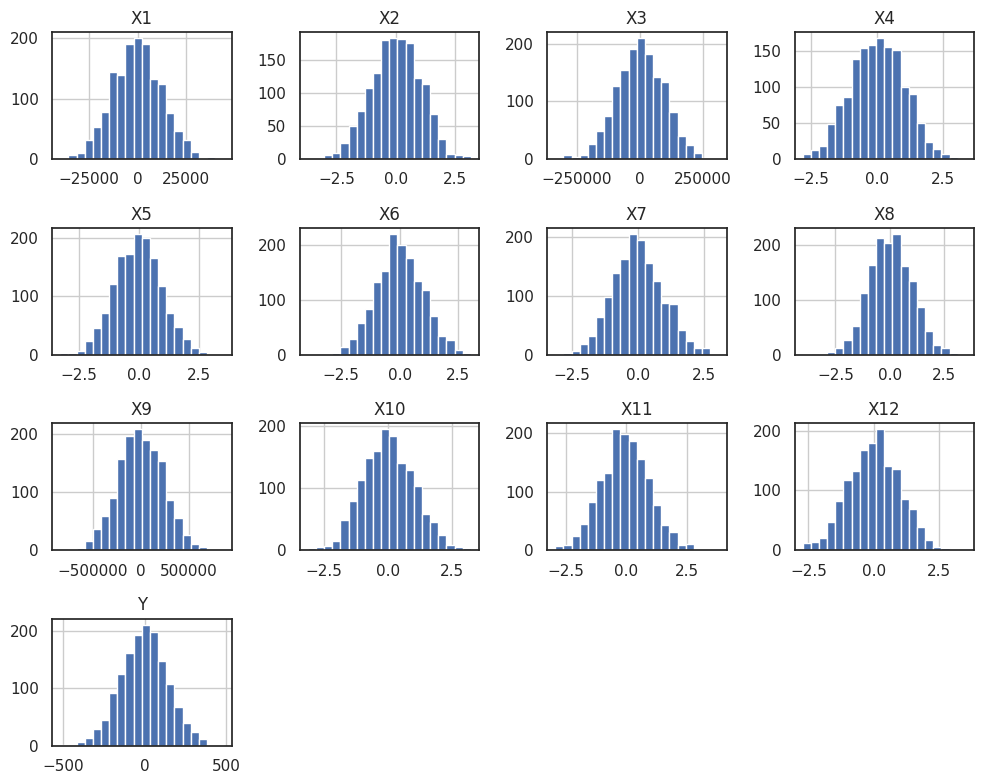

In [ ]:
# Distribuciones univariadas de variables numéricas
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
df_reg[num_cols_reg].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

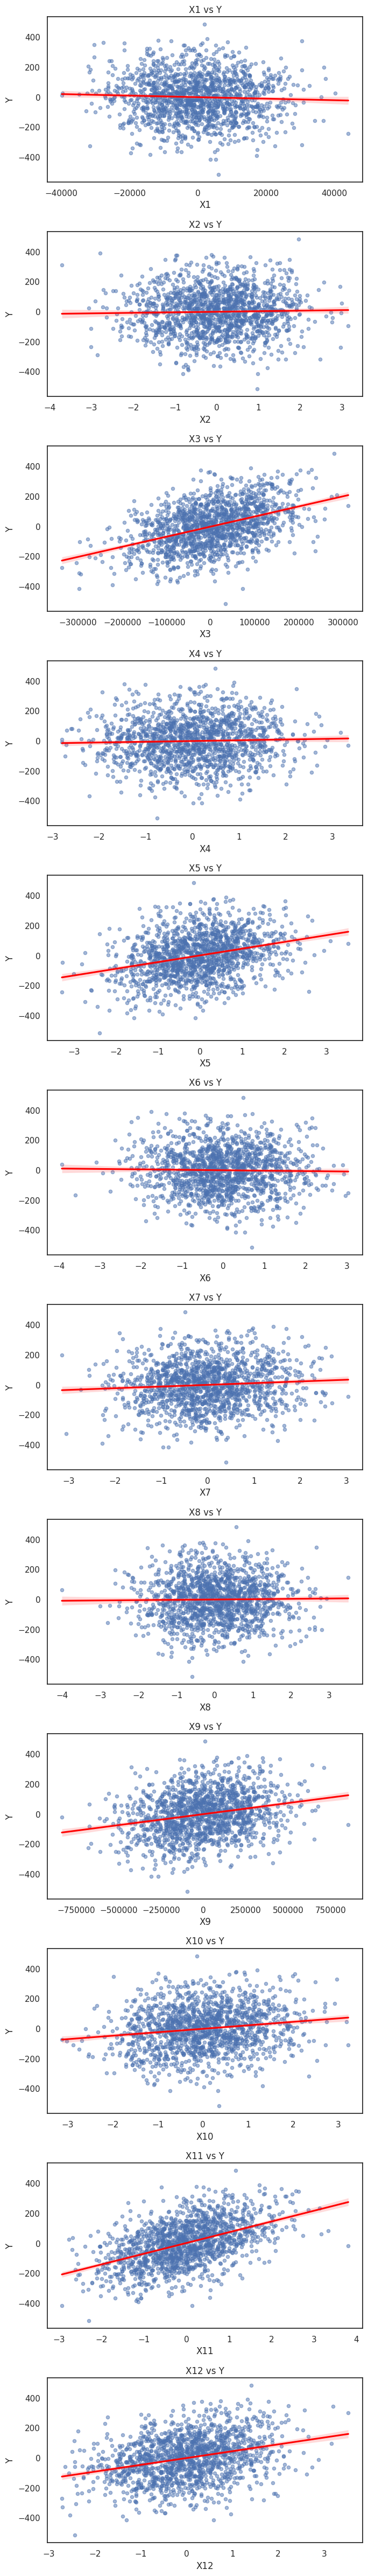

In [ ]:
from pandas.plotting import scatter_matrix

# Variables numéricas y clase+

numeric_cols_reg = num_cols_reg.drop("Y")
reg_vals = df_reg["Y"]

import matplotlib.pyplot as plt
import seaborn as sns

# Preparar la figura con subplots: uno por cada predictor
n_feats = len(numeric_cols_reg)
fig, axes = plt.subplots(n_feats, 1, figsize=(7, 4 * n_feats))

for ax, feat in zip(axes, numeric_cols_reg):
    sns.regplot(
        x=feat,
        y="Y",
        data=df_reg,
        ax=ax,
        scatter_kws={"alpha": 0.5, "s": 20},
        line_kws={"color": "red"},
    )
    ax.set_title(f"{feat} vs Y")
    ax.set_xlabel(feat)
    ax.set_ylabel("Y")

plt.tight_layout()
plt.show()

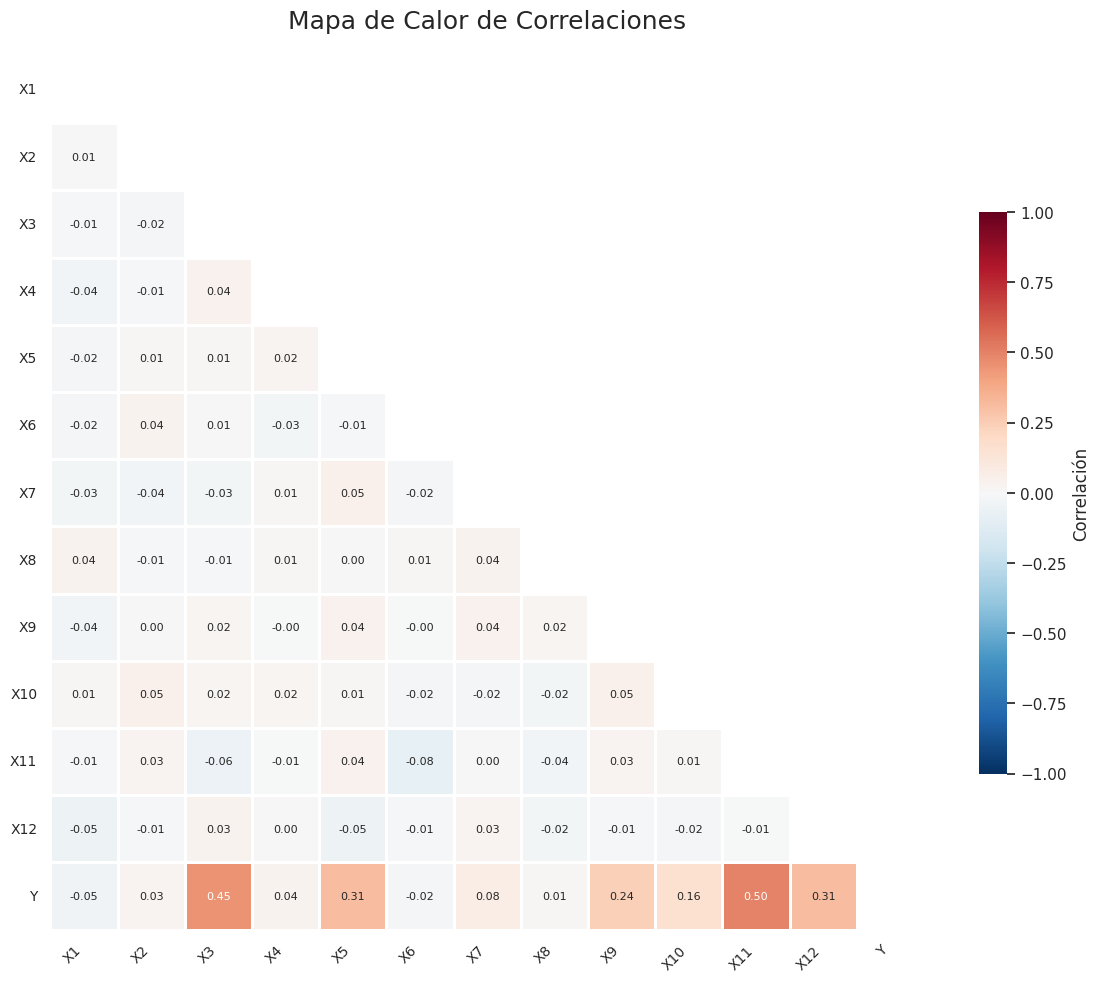

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_reg[numeric_cols_reg.tolist() + ["Y"]].corr()


sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))

n = corr.shape[0]
fig, ax = plt.subplots(figsize=(1.2 * n, 1.2 * n))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=1.0,  # líneas más gruesas entre celdas
    square=True,  # celdas cuadradas
    annot_kws={"size": 8},  # texto más pequeño
    cbar_kws={"shrink": 0.6, "label": "Correlación"},
    vmin=-1,
    vmax=1,
    ax=ax,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.subplots_adjust(bottom=0.3, left=0.2, top=0.9)

ax.set_title("Mapa de Calor de Correlaciones", fontsize=18, pad=20)

plt.show()

# Comments

## Classification

* El dataset tiene. 1.500 observaciones y 16 columnas (15 numéricas y 1 categórica de clase Y). Las variables X1–X15 son float64 y Y es int64 con valores {0,1,2}
* Menos del 1 % de datos faltantes en 8 de las 15 variables (máx. 3 filas en X2/X4), representando sólo ~15 muestras; tras eliminar nulos quedan 1,485 filas.
* Percentiles 25, 50 y 75 en 0,1,2 nos indican clases equilibradas (~500 ejemplos por clase).
* Medias centradas cerca de cero, desviaciones estándar en rango 3–8; rangos totales amplios (~–12 a +12).
* Formas multimodales: Casi todas las Xi presentan tres picos bien definidos en sus histogramas, sugiriendo agrupamientos naturales alineados con las tres clases.
* Variables como X1, X13 o X14 muestran diferencias notorias que permiten discriminar clases de forma sencilla.
* Los scatterplots de Y vs X1, X8, X13 nos confirman agrupamientos clasificables por rangos de cada variable.
* La mayoría de pares muestran tres nubes separadas, lo que podría confirmar buena separabilidad en un espacio 2D.
* Existen múltiples pares con correlaciones muy fuertes $|ρ|>0.9$.
* Y se correlaciona fuertemente con X6 (+0.96), X7 (+0.93) y negativamente con X13 (–0.98), indicando variables predictoras muy informativas.
* **Multicolinealidad:** Alta redundancia entre características (varias parejas >0.9), se podrían usar técnicas de selección o reducción de dimensión para evitar sobreajuste.
* Dado el grado de separabilidad y la poca cantidad de datos faltantes, muy probablemente, nuestros modelos logren alta precisión sin complicación alguna.

## Regression
* El dataset contiene 1 473 observaciones y 13 columnas — 12 predictoras (X1-X12, float64) y la variable objetivo Y (float64).
* Menos del 2 % de datos faltantes repartidos en varias Xi; tras eliminar nulos se conservan las 1 473 filas (pérdida ≈ 1,8 %).
* Varias de las variables parecieran seguir distribuciones normales centradas en 0.
* X1, X3, X9 presentan rangos mucho más grandes y colas pesadas.
* Desviaciones estándar distintas y distantes en X1 (~ 12 665), X3 (~ 95 364) y X9 (~ 233 212) frente a ≈ 1 en el resto, necesitaremos de escalado en este caso.
* Correlación lineal con Y moderada en: X11 (ρ≈ 0,50), X3 (≈ 0,45), X12 (≈ 0,31), X5 (≈ 0,31) y X9 (≈ 0,24); el resto de Xi muestra ρ≈ 0.
* **Multicolinealidad mínima**: coeficientes Xi-Xj muy bajos (|ρ| < 0,06), por lo que las variables son prácticamente independientes.